##### Imports

In [31]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split



##### Data Loading

In [219]:
walking_df = pd.read_csv("MLG __ Data - walking (1).csv")
running_df = pd.read_csv("running - Running.csv")
jogging_df = pd.read_csv("jogging - Jogging.csv")
running_df_1 = pd.read_csv("MLG __ Data - Running.csv")

C:\Users\31610\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3269: DtypeWarning: Columns (1,2,3,4,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\31610\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3269: DtypeWarning: Columns (5,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [220]:
jogging_df.rename(columns={'1': 'Experiment'}, inplace=True)
walking_df = walking_df[walking_df['Experiment'].isin(jogging_df.Experiment.unique())]
running_df = running_df[running_df['experiment'].isin(jogging_df.Experiment.unique())]
jogging_df.loc[jogging_df['Time (s)'].notna(),'Label'] = 'jogging'
running_df.loc[running_df['Time (s)'].notna(),'Label'] = 'running'

In [222]:
walking_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120363 entries, 0 to 120746
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Experiment                     120363 non-null  float64
 1   Time (s)                       52862 non-null   object 
 2   Linear Acceleration x (m/s^2)  52862 non-null   object 
 3   Linear Acceleration y (m/s^2)  52862 non-null   object 
 4   Linear Acceleration z (m/s^2)  52862 non-null   object 
 5   Time (s).1                     120275 non-null  object 
 6   Gyroscope x (rad/s)            120275 non-null  object 
 7   Gyroscope y (rad/s)            120275 non-null  object 
 8   Gyroscope z (rad/s)            120275 non-null  object 
 9   Label                          6070 non-null    object 
dtypes: float64(1), object(9)
memory usage: 10.1+ MB


In [186]:
running_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120562 entries, 0 to 120609
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   experiment                     120562 non-null  float64
 1   Time (s)                       53058 non-null   object 
 2   Linear Acceleration x (m/s^2)  53058 non-null   object 
 3   Linear Acceleration y (m/s^2)  53058 non-null   object 
 4   Linear Acceleration z (m/s^2)  53058 non-null   object 
 5   Time (s).1                     120467 non-null  object 
 6   Gyroscope x (rad/s)            120467 non-null  object 
 7   Gyroscope y (rad/s)            120467 non-null  object 
 8   Gyroscope z (rad/s)            120467 non-null  object 
 9   Absolute (rad/s)               30465 non-null   object 
 10  Label                          53058 non-null   object 
dtypes: float64(1), object(10)
memory usage: 11.0+ MB


In [187]:
jogging_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156473 entries, 0 to 156472
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Experiment                     156473 non-null  int64 
 1   Time (s)                       64719 non-null   object
 2   Linear Acceleration x (m/s^2)  64719 non-null   object
 3   Linear Acceleration y (m/s^2)  64719 non-null   object
 4   Linear Acceleration z (m/s^2)  64719 non-null   object
 5   Time (s).1                     156473 non-null  object
 6   Gyroscope x (rad/s)            156473 non-null  object
 7   Gyroscope y (rad/s)            156473 non-null  object
 8   Gyroscope z (rad/s)            156473 non-null  object
 9   Label                          64719 non-null   object
dtypes: int64(1), object(9)
memory usage: 11.9+ MB


In [188]:
walking_df.head()

,Experiment,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Time (s).1,Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Label
0,1.0,"5,24E-03","6,36E-01","1,15E+00","-1,55E+00","5,82E-03","-4,16E-01","-9,86E-01","-5,83E-01",walking
1,1.0,"1,53E-02","2,69E-01","1,29E+00","-1,57E+00","1,58E-02","-4,64E-01","-9,81E-01","-5,24E-01",walking
2,1.0,"2,53E-02","1,36E-01","1,49E+00","-1,06E+00","2,59E-02","-5,24E-01","-9,75E-01","-4,71E-01",walking
3,1.0,"3,53E-02","-9,98E-02","1,55E+00","-3,90E-01","3,59E-02","-5,81E-01","-9,01E-01","-4,26E-01",walking
4,1.0,"4,53E-02","-3,31E-01","1,46E+00","4,85E-01","4,59E-02","-5,82E-01","-7,14E-01","-3,72E-01",walking


In [189]:
running_df.head()

,experiment,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Time (s).1,Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Absolute (rad/s),Label
0,1.0,"4,25E-03","-2,47E+00","1,96E+00","-2,07E+00","-2,49E-03","-2,74E-01","-5,30E-01","2,45E-01","6,45E-01",running
1,1.0,"1,43E-02","-2,76E+00","2,14E+00","-2,55E+00","7,53E-03","-3,75E-01","-5,30E-01","2,89E-01","7,11E-01",running
2,1.0,"2,43E-02","-2,85E+00","2,41E+00","-2,96E+00","1,75E-02","-4,80E-01","-4,58E-01","3,27E-01","7,40E-01",running
3,1.0,"3,43E-02","-2,79E+00","2,74E+00","-3,38E+00","2,76E-02","-6,01E-01","-3,49E-01","3,45E-01","7,76E-01",running
4,1.0,"4,43E-02","-2,91E+00","2,91E+00","-3,59E+00","3,76E-02","-7,39E-01","-2,25E-01","3,48E-01","8,47E-01",running


In [190]:
jogging_df.head()

,Experiment,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Time (s).1,Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Label
0,1,"0,101486524","0,06818556786","0,02603590488","0,06165242195","0,100263763","0,6567161679","-0,7425339818","0,9977238774",jogging
1,1,"0,106432201","0,1308043003","0,08983400464","0,147849679","0,102736524","0,650857389","-0,9034507871","1,06117177",jogging
2,1,"0,111377774","0,1555417776","0,1573096514","0,312802434","0,105209388","0,6338136196","-0,9253546","1,064367533",jogging
3,1,"0,116323399","0,1685538292","0,2018541247","0,5971755981","0,107682201","0,5927355886","-0,9541159272","1,042996287",jogging
4,1,"0,121291159","0,2831140757","0,3047571182","0,5918277502","0,110155013","0,582615912","-0,992464304","1,048322439",jogging


In [191]:
walking_df.describe()

,Experiment
count,120363.000000
mean,5.989307
std,2.007731
min,1.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,8.000000


In [192]:
running_df.describe()

,experiment
count,120562.000000
mean,5.984962
std,2.009734
min,1.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,8.000000


In [193]:
jogging_df.describe()

,Experiment
count,156473.000000
mean,4.949557
std,2.597969
min,1.000000
25%,2.000000
50%,6.000000
75%,7.000000
max,8.000000


In [194]:
running_df.isnull().sum()

experiment                           0
Time (s)                         67504
Linear Acceleration x (m/s^2)    67504
Linear Acceleration y (m/s^2)    67504
Linear Acceleration z (m/s^2)    67504
Time (s).1                          95
Gyroscope x (rad/s)                 95
Gyroscope y (rad/s)                 95
Gyroscope z (rad/s)                 95
Absolute (rad/s)                 90097
Label                            67504
dtype: int64

In [195]:
walking_df.isnull().sum()

Experiment                            0
Time (s)                          67501
Linear Acceleration x (m/s^2)     67501
Linear Acceleration y (m/s^2)     67501
Linear Acceleration z (m/s^2)     67501
Time (s).1                           88
Gyroscope x (rad/s)                  88
Gyroscope y (rad/s)                  88
Gyroscope z (rad/s)                  88
Label                            114293
dtype: int64

In [196]:
jogging_df.isnull().sum()

Experiment                           0
Time (s)                         91754
Linear Acceleration x (m/s^2)    91754
Linear Acceleration y (m/s^2)    91754
Linear Acceleration z (m/s^2)    91754
Time (s).1                           0
Gyroscope x (rad/s)                  0
Gyroscope y (rad/s)                  0
Gyroscope z (rad/s)                  0
Label                            91754
dtype: int64

In [223]:
# Update clean function to handle lowercase column name variation
def clean_sensor_df(df, label_name):
    df = df.copy()
    df['Label'] = label_name

    # Standardize experiment column name
    if 'Experiment' not in df.columns and 'experiment' in df.columns:
        df.rename(columns={'experiment': 'Experiment'}, inplace=True)

    # Convert sensor columns to numeric (replace comma with dot)
    sensor_cols = [
        "Linear Acceleration x (m/s^2)", "Linear Acceleration y (m/s^2)", "Linear Acceleration z (m/s^2)",
        "Gyroscope x (rad/s)", "Gyroscope y (rad/s)", "Gyroscope z (rad/s)"
    ]
    for col in sensor_cols:
        df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

    # Convert timestamp to float
    df["Time (s)"] = df["Time (s)"].astype(str).str.replace(',', '.').astype(float)
    return df[["Experiment", "Time (s)"] + sensor_cols + ["Label"]].dropna()

# Clean both datasets again
walking_clean = clean_sensor_df(walking_df, "walking")
running_clean = clean_sensor_df(running_df, "running")
jogging_clean = clean_sensor_df(running_df, "jogging")

# Merge
combined_df = pd.concat([walking_clean, running_clean, jogging_clean], ignore_index=True)


# Perform 80/20 split per experiment
train_dfs = []
test_dfs = []

for exp in combined_df["Experiment"].unique():
    exp_df = combined_df[combined_df["Experiment"] == exp]
    train_split, test_split = train_test_split(exp_df, test_size=0.2, random_state=42, stratify=exp_df["Label"])
    train_dfs.append(train_split)
    test_dfs.append(test_split)

# Concatenate all splits
train_df = pd.concat(train_dfs).reset_index(drop=True)
test_df = pd.concat(test_dfs).reset_index(drop=True)

# Output the shapes
train_df.shape, test_df.shape

((126956, 9), (31744, 9))

In [224]:
# Common sensor columns
sensor_cols = [
    "Linear Acceleration x (m/s^2)", "Linear Acceleration y (m/s^2)", "Linear Acceleration z (m/s^2)",
    "Gyroscope x (rad/s)", "Gyroscope y (rad/s)", "Gyroscope z (rad/s)"
]

# Sort and interpolate train set
train_df = train_df.sort_values(by=["Experiment", "Time (s)"]).reset_index(drop=True)
train_df[sensor_cols] = (
    train_df.groupby("Experiment")[sensor_cols]
    .transform(lambda group: group.interpolate(method='linear', limit_direction='both'))
)

trimmed_means = {}

for exp in train_df["Experiment"].unique():
    exp_trimmed = {}
    for col in sensor_cols:
        series = train_df.loc[train_df["Experiment"] == exp, col]
        trimmed = series[(series > series.quantile(0.01)) & (series < series.quantile(0.99))]
        exp_trimmed[col] = trimmed.mean()
    trimmed_means[exp] = exp_trimmed

for exp in train_df["Experiment"].unique():
    for col in sensor_cols:
        mask = (train_df["Experiment"] == exp) & (train_df[col].isna())
        train_df.loc[mask, col] = trimmed_means[exp][col]

test_df = test_df.sort_values(by=["Experiment", "Time (s)"]).reset_index(drop=True)
test_df[sensor_cols] = (
    test_df.groupby("Experiment")[sensor_cols]
    .transform(lambda group: group.interpolate(method='linear', limit_direction='both'))
)

# Fill test NaNs with trimmed means from corresponding train experiment
for exp in test_df["Experiment"].unique():
    if exp in trimmed_means:  # skip if test experiment doesn't exist in train
        for col in sensor_cols:
            mask = (test_df["Experiment"] == exp) & (test_df[col].isna())
            test_df.loc[mask, col] = trimmed_means[exp][col]

# Drop rows with missing labels
train_df = train_df.dropna(subset=["Label"])
test_df = test_df.dropna(subset=["Label"])

In [225]:
combined_df = train_df
combined_df.head()

,Experiment,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Label
0,1.0,0.00425,-2.470,1.96,-2.07,-0.274,-0.530,0.245,jogging
1,1.0,0.00425,-2.470,1.96,-2.07,-0.274,-0.530,0.245,running
2,1.0,0.00524,0.636,1.15,-1.55,-0.416,-0.986,-0.583,walking
3,1.0,0.01430,-2.760,2.14,-2.55,-0.375,-0.530,0.289,jogging
4,1.0,0.01530,0.269,1.29,-1.57,-0.464,-0.981,-0.524,walking


In [226]:
combined_df.shape

(126956, 9)

In [227]:
# Add derived features: acceleration and gyroscope magnitude
combined_df["acc_mag"] = np.sqrt(
    combined_df["Linear Acceleration x (m/s^2)"]**2 +
    combined_df["Linear Acceleration y (m/s^2)"]**2 +
    combined_df["Linear Acceleration z (m/s^2)"]**2
)

combined_df["gyro_mag"] = np.sqrt(
    combined_df["Gyroscope x (rad/s)"]**2 +
    combined_df["Gyroscope y (rad/s)"]**2 +
    combined_df["Gyroscope z (rad/s)"]**2
)

# Define window size in seconds
window_size = 1.0

# Sort the data to ensure order
combined_df.sort_values(by=["Label", "Experiment", "Time (s)"], inplace=True)

# Function to assign window index
def compute_window_index(df, window_size):
    return (df["Time (s)"] // window_size).astype(int)

combined_df["window"] = combined_df.groupby(["Label", "Experiment"]).apply(
    compute_window_index, window_size=window_size
).reset_index(drop=True)

# Aggregate features per window
agg_features = combined_df.groupby(["Label", "Experiment", "window"]).agg({
    "Linear Acceleration x (m/s^2)": ['mean', 'std'],
    "Linear Acceleration y (m/s^2)": ['mean', 'std'],
    "Linear Acceleration z (m/s^2)": ['mean', 'std'],
    "Gyroscope x (rad/s)": ['mean', 'std'],
    "Gyroscope y (rad/s)": ['mean', 'std'],
    "Gyroscope z (rad/s)": ['mean', 'std'],
    "acc_mag": ['mean', 'std'],
    "gyro_mag": ['mean', 'std']
}).reset_index()

# Flatten column names
agg_features.columns = ['_'.join(col).strip('_') for col in agg_features.columns.values]

# Compute summary statistics over the aggregated features
feature_cols = [col for col in agg_features.columns if any(stat in col for stat in ['mean', 'std'])]
summary_stats = agg_features[feature_cols].describe().transpose()

# Show the first few rows of the summary statistics
summary_stats.head()


,count,mean,std,min,25%,50%,75%,max
Linear Acceleration x (m/s^2)_mean,1476.0,3.959908,6.219959,-17.000000,0.030520,2.835759,6.813214,28.705275
Linear Acceleration x (m/s^2)_std,1475.0,9.917069,6.430152,0.070711,1.873587,11.908962,15.107214,24.617013
Linear Acceleration y (m/s^2)_mean,1476.0,-1.217027,3.693452,-17.575000,-2.979506,-0.533067,0.270675,9.357500
Linear Acceleration y (m/s^2)_std,1475.0,8.753307,5.907025,0.074246,1.964530,9.243024,13.795875,23.022954
Linear Acceleration z (m/s^2)_mean,1476.0,0.168968,2.287642,-9.712621,-0.563211,0.235697,1.322179,9.807258


In [228]:
# Set seaborn style
sns.set(style="whitegrid")

# Select features for boxplots
features_to_plot = [
    "acc_mag_mean", "acc_mag_std",
    "gyro_mag_mean", "gyro_mag_std"
]

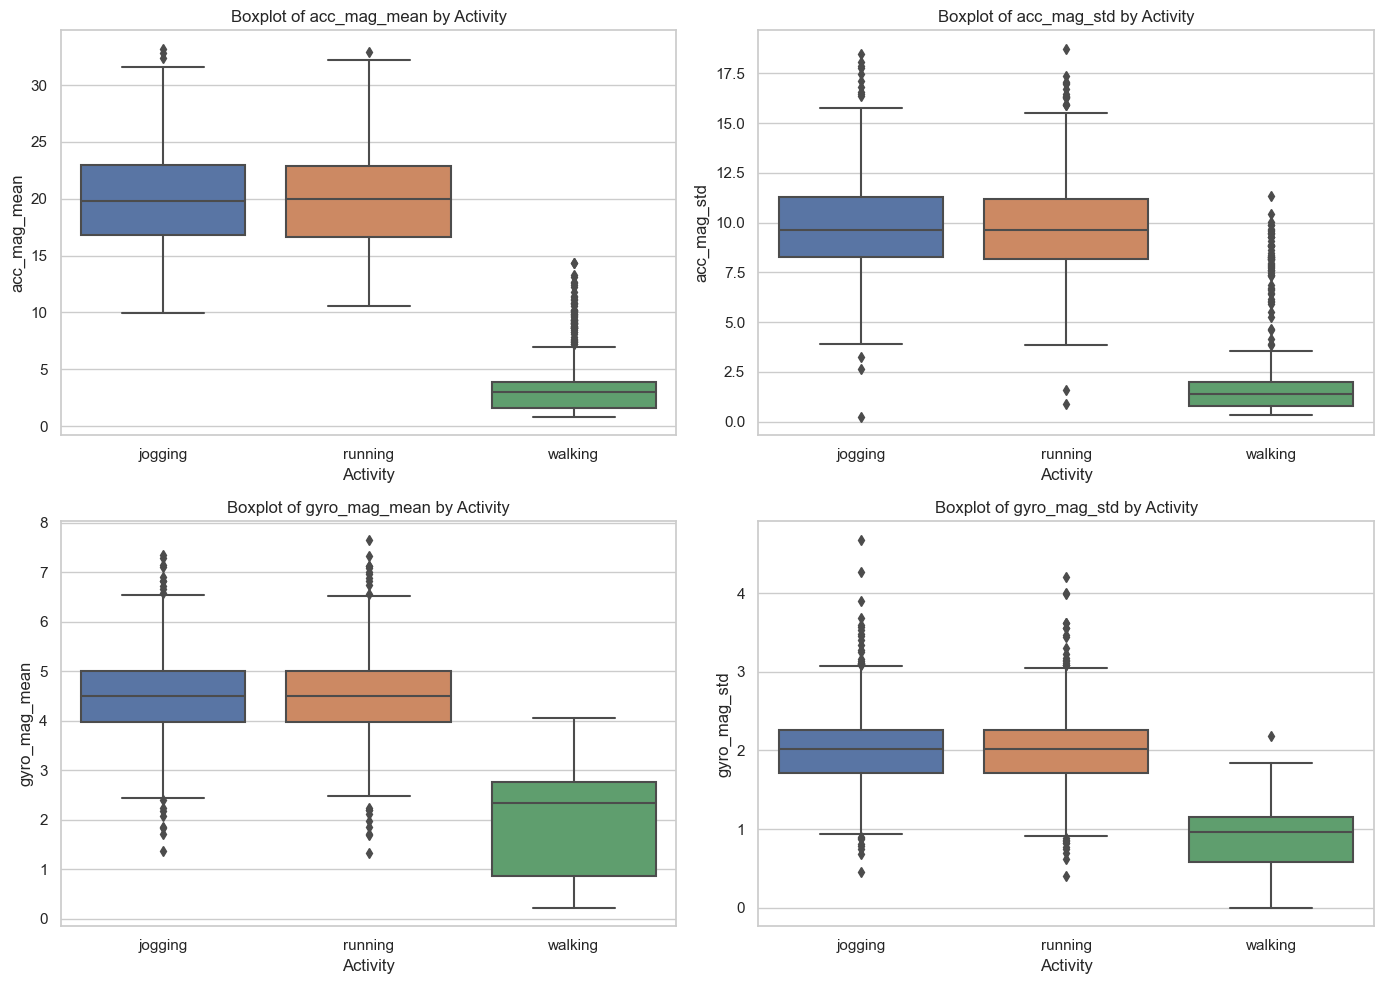

In [229]:
# Restore correct label column name
agg_features.rename(columns={"Label_": "Label"}, inplace=True)

# Create boxplots for selected features
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=agg_features, x="Label", y=feature)
    plt.title(f'Boxplot of {feature} by Activity')
    plt.xlabel("Activity")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()



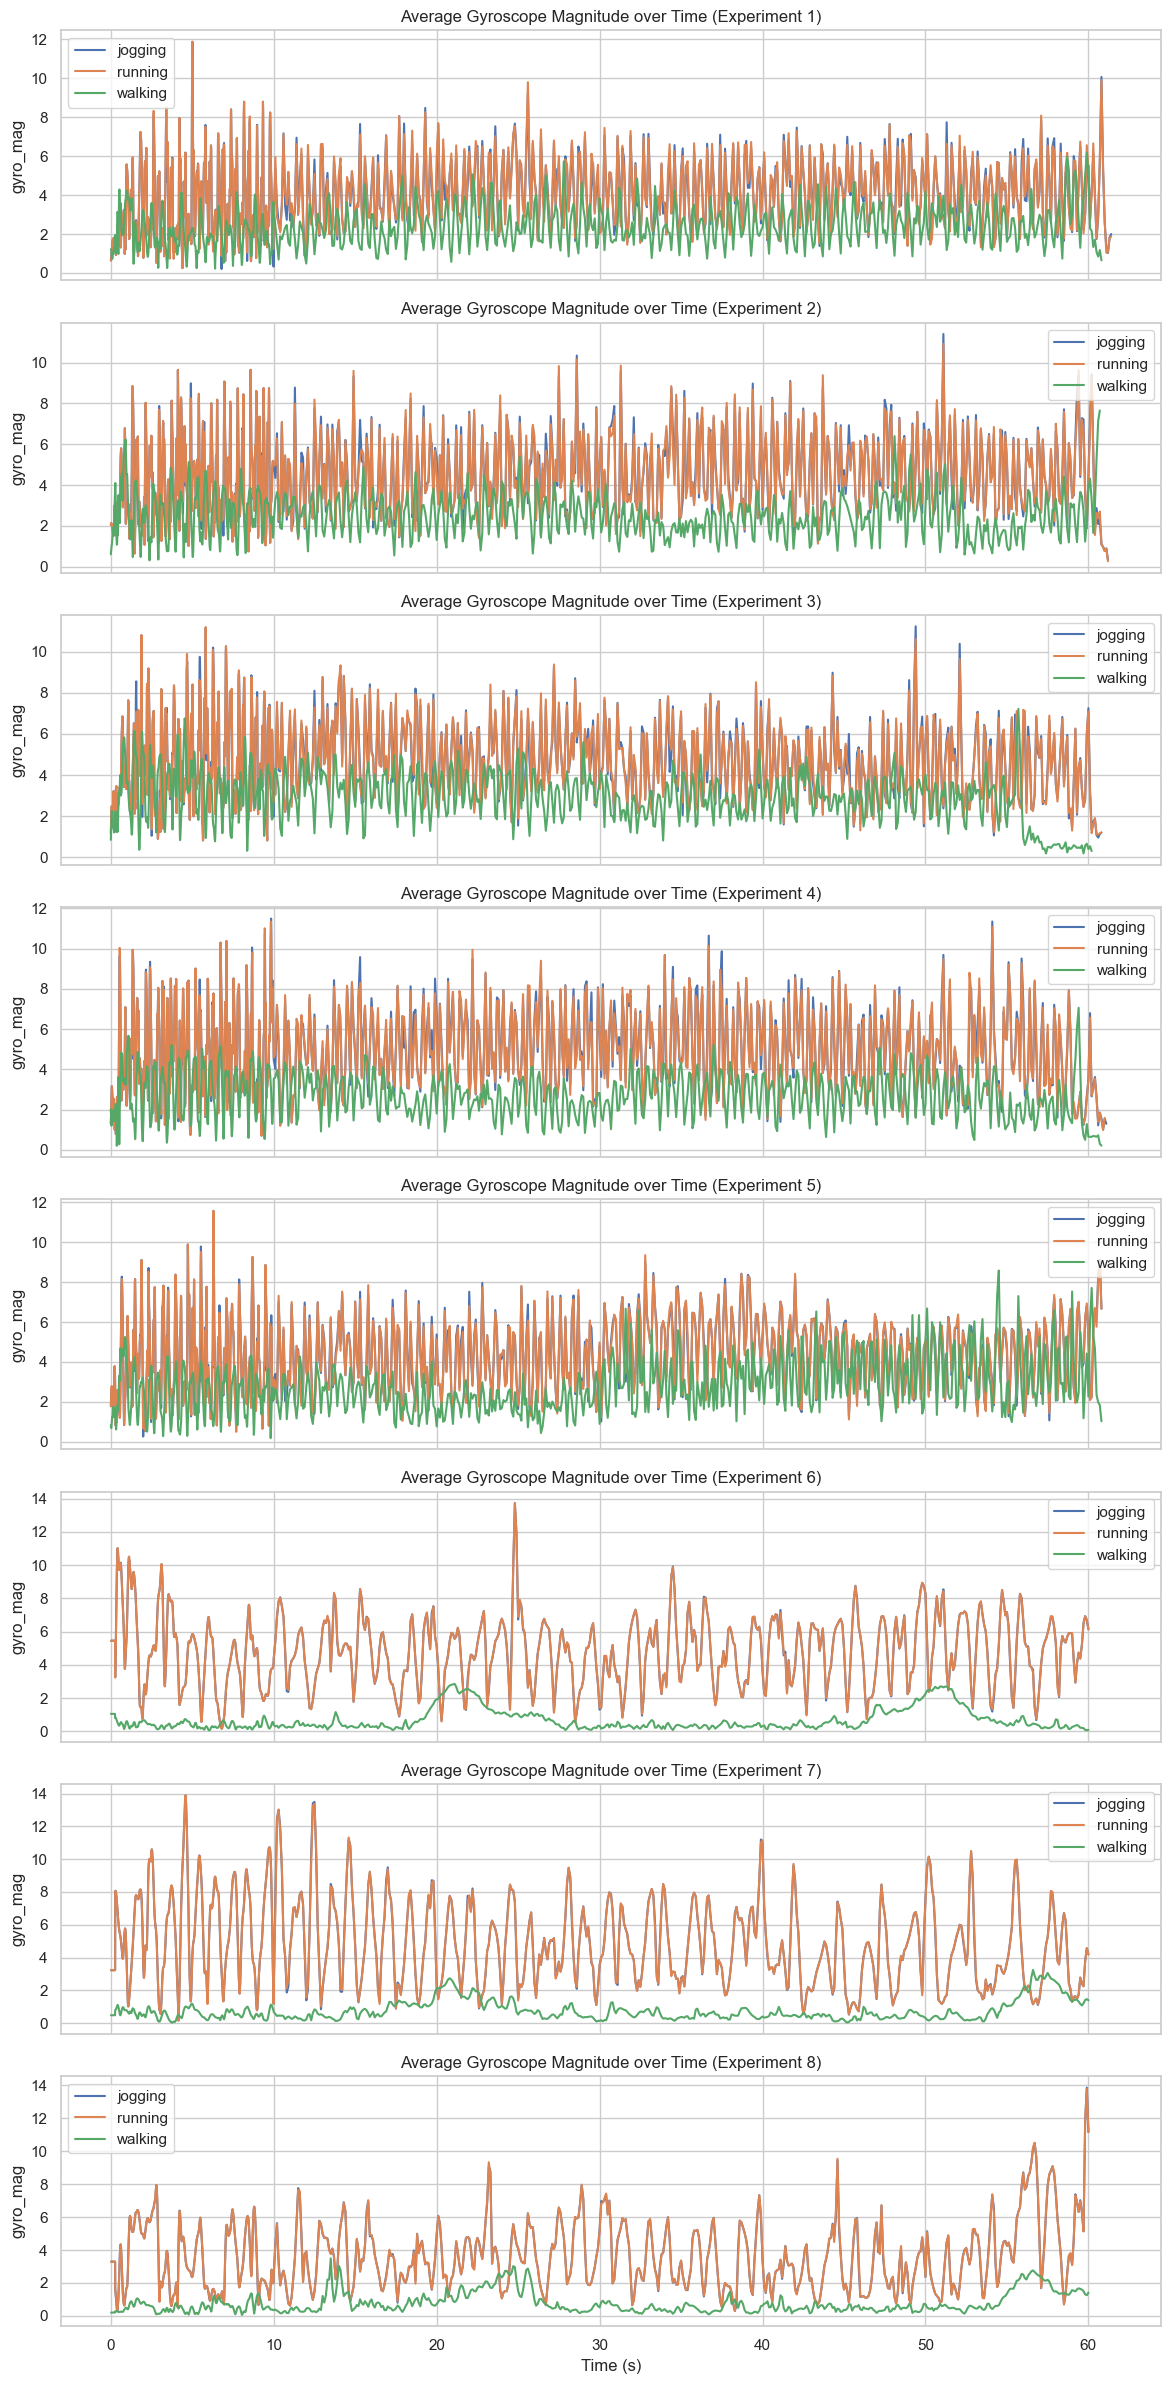

In [230]:
# Create average gyroscope magnitude per time (averaged across all experiments for each activity)
gyro_avg_per_time = combined_df.groupby(["Label", "Experiment", "Time (s)"])["gyro_mag"].mean().reset_index()

# Plot gyroscope magnitude over time per experiment
unique_experiments = sorted(combined_df["Experiment"].unique())
num_experiments = len(unique_experiments)

# Create a subplot for each experiment
fig, axs = plt.subplots(nrows=num_experiments, figsize=(12, 3 * num_experiments), sharex=True)

for i, exp in enumerate(unique_experiments):
    ax = axs[i] if num_experiments > 1 else axs
    for label in gyro_avg_per_time["Label"].unique():
        subset = gyro_avg_per_time[(gyro_avg_per_time["Experiment"] == exp) & (gyro_avg_per_time["Label"] == label)]
        ax.plot(subset["Time (s)"], subset["gyro_mag"], label=label)
    ax.set_title(f"Average Gyroscope Magnitude over Time (Experiment {int(exp)})")
    ax.set_ylabel("gyro_mag")
    ax.legend()

plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()

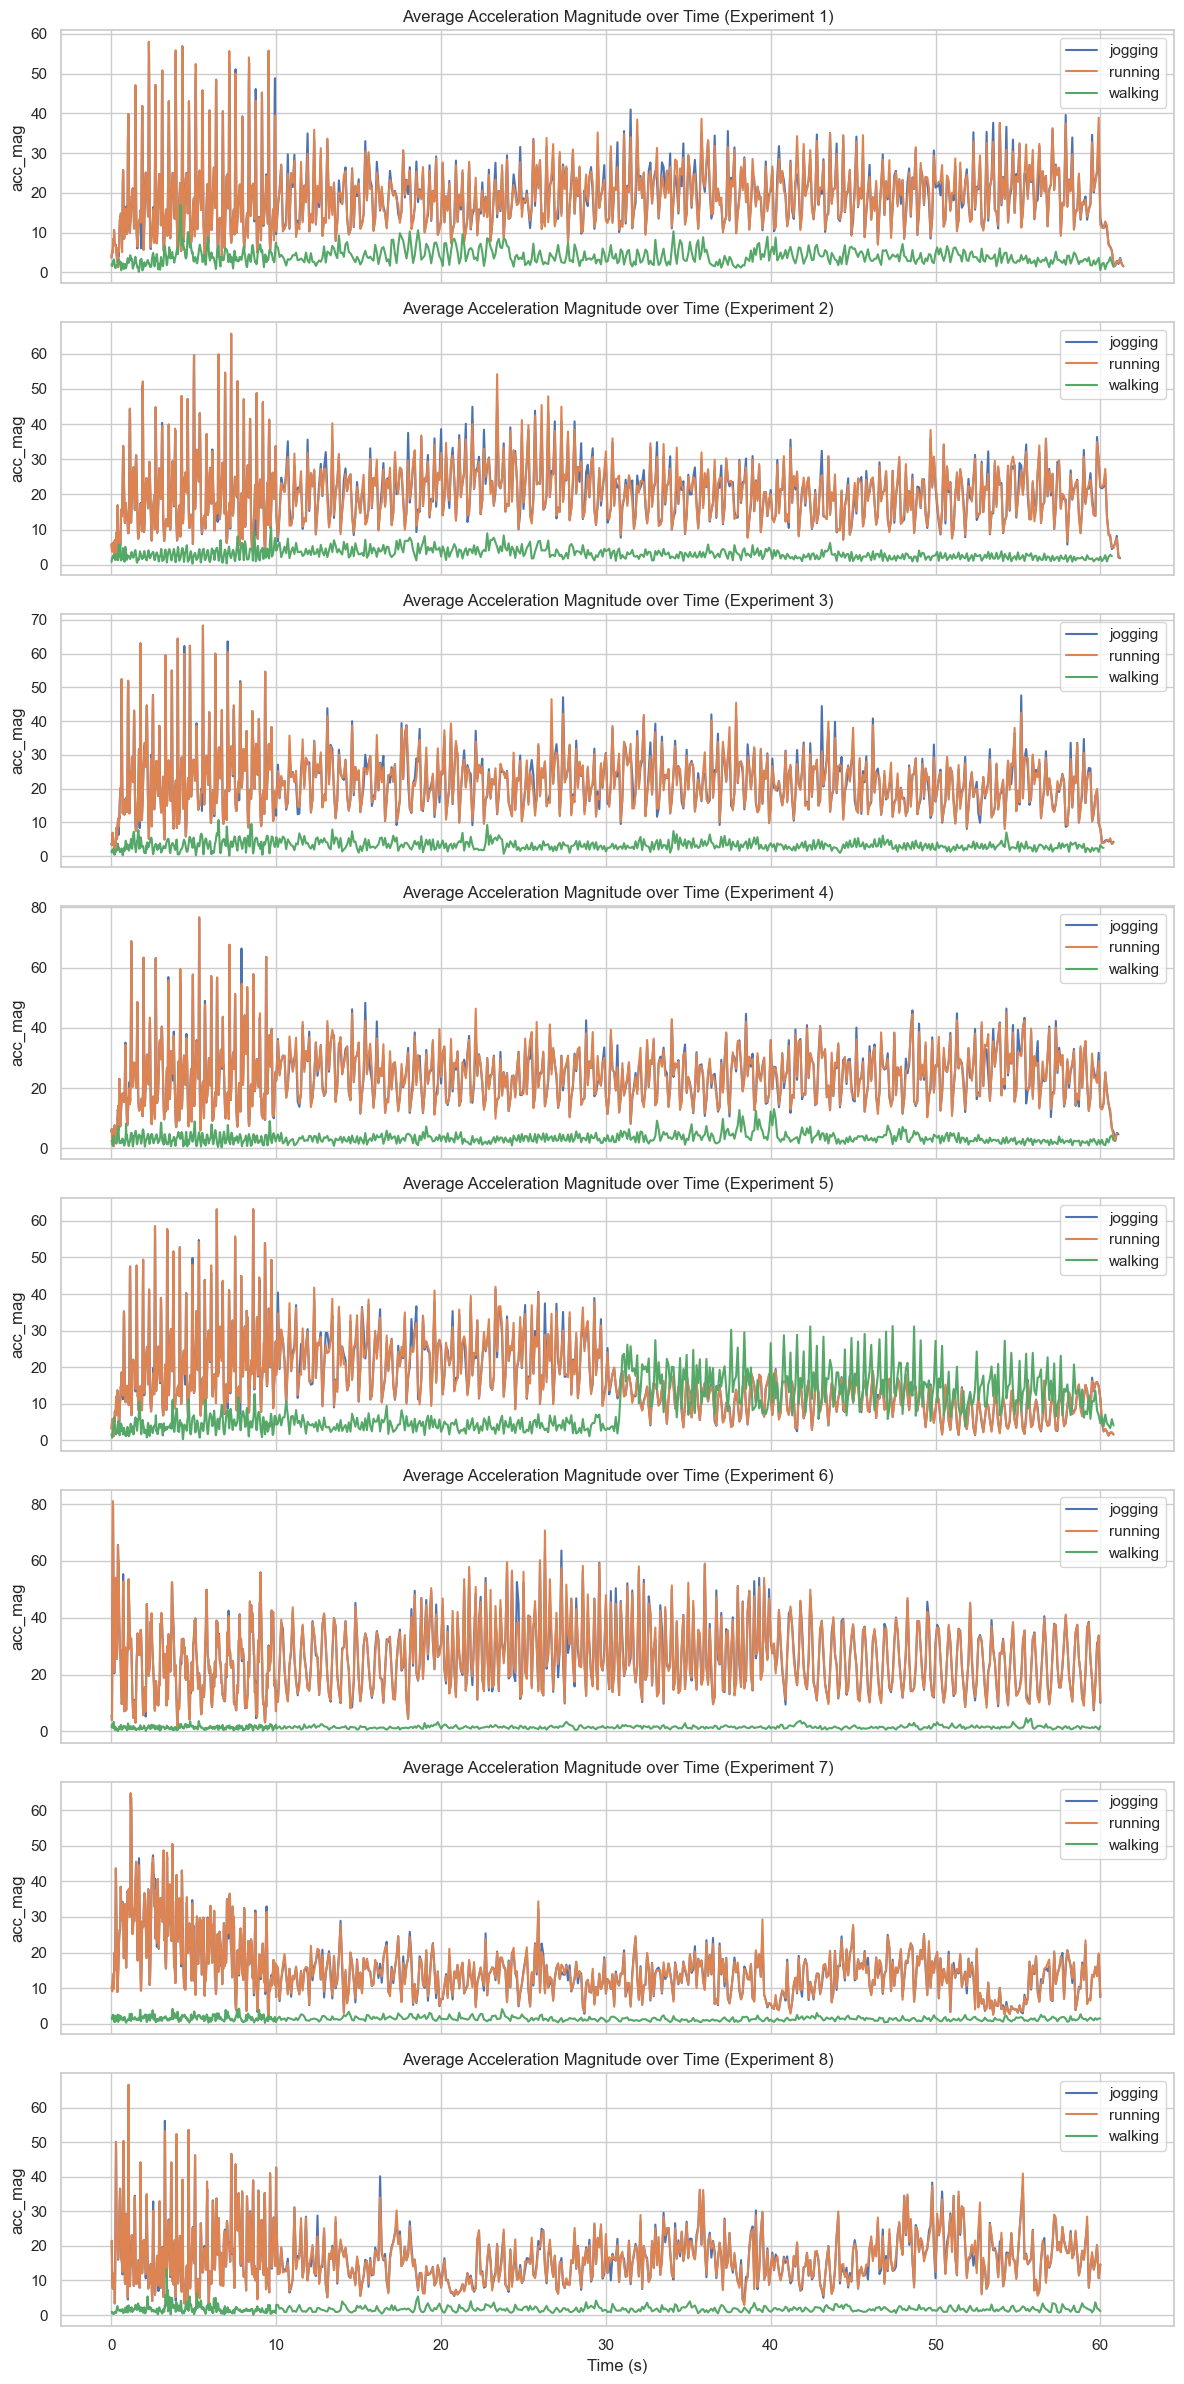

In [231]:
# Compute average acceleration magnitude per time (across experiments and labels)
combined_df["acc_mag"] = np.sqrt(
    combined_df["Linear Acceleration x (m/s^2)"]**2 +
    combined_df["Linear Acceleration y (m/s^2)"]**2 +
    combined_df["Linear Acceleration z (m/s^2)"]**2
)

# Group by label, experiment, and time to compute average acc_mag
acc_avg_per_time = combined_df.groupby(["Label", "Experiment", "Time (s)"])["acc_mag"].mean().reset_index()

# Plot acceleration magnitude over time per experiment
fig, axs = plt.subplots(nrows=num_experiments, figsize=(12, 3 * num_experiments), sharex=True)

for i, exp in enumerate(unique_experiments):
    ax = axs[i] if num_experiments > 1 else axs
    for label in acc_avg_per_time["Label"].unique():
        subset = acc_avg_per_time[(acc_avg_per_time["Experiment"] == exp) & (acc_avg_per_time["Label"] == label)]
        ax.plot(subset["Time (s)"], subset["acc_mag"], label=label)
    ax.set_title(f"Average Acceleration Magnitude over Time (Experiment {int(exp)})")
    ax.set_ylabel("acc_mag")
    ax.legend()

plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()

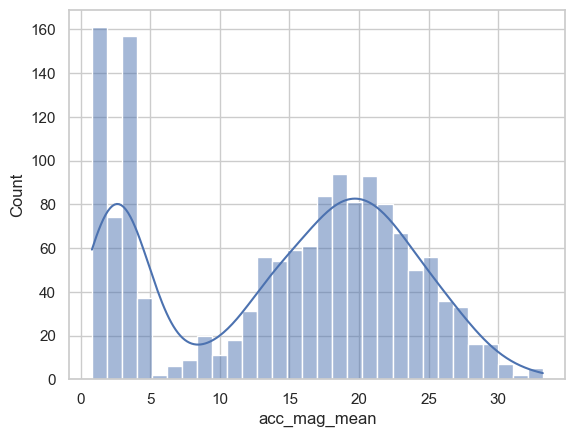

In [232]:
sns.histplot(data=agg_features, x="acc_mag_mean", bins=30, kde=True)
plt.show()

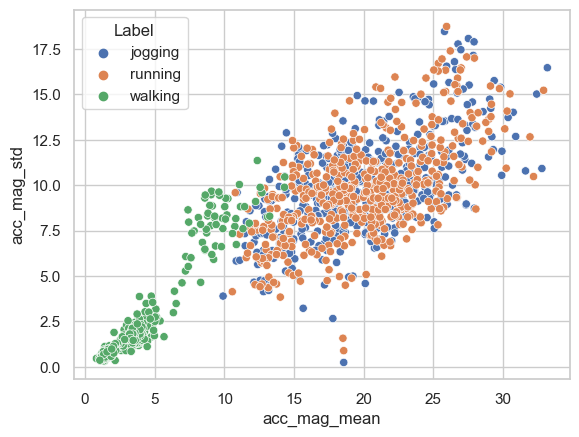

In [233]:
sns.scatterplot(data=agg_features, x="acc_mag_mean", y="acc_mag_std", hue="Label")
plt.show()

In [234]:
walking_df

,Experiment,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Time (s).1,Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Label
0,1.0,"5,24E-03","6,36E-01","1,15E+00","-1,55E+00","5,82E-03","-4,16E-01","-9,86E-01","-5,83E-01",walking
1,1.0,"1,53E-02","2,69E-01","1,29E+00","-1,57E+00","1,58E-02","-4,64E-01","-9,81E-01","-5,24E-01",walking
2,1.0,"2,53E-02","1,36E-01","1,49E+00","-1,06E+00","2,59E-02","-5,24E-01","-9,75E-01","-4,71E-01",walking
3,1.0,"3,53E-02","-9,98E-02","1,55E+00","-3,90E-01","3,59E-02","-5,81E-01","-9,01E-01","-4,26E-01",walking
4,1.0,"4,53E-02","-3,31E-01","1,46E+00","4,85E-01","4,59E-02","-5,82E-01","-7,14E-01","-3,72E-01",walking
...,...,...,...,...,...,...,...,...,...,...
120742,8.0,NaN,NaN,NaN,NaN,"6,00E+01","3,57E-01","-1,03E+00","-1,03E+00",NaN
120743,8.0,NaN,NaN,NaN,NaN,"6,00E+01","3,58E-01","-1,05E+00","-1,02E+00",NaN
120744,8.0,NaN,NaN,NaN,NaN,"6,00E+01","3,54E-01","-1,07E+00","-1,01E+00",NaN
120745,8.0,NaN,NaN,NaN,NaN,"6,00E+01","3,52E-01","-1,08E+00","-9,99E-01",NaN


In [235]:
train_df = agg_features.copy()
agg_features.head()


,Label,Experiment,window,Linear Acceleration x (m/s^2)_mean,Linear Acceleration x (m/s^2)_std,Linear Acceleration y (m/s^2)_mean,Linear Acceleration y (m/s^2)_std,Linear Acceleration z (m/s^2)_mean,Linear Acceleration z (m/s^2)_std,Gyroscope x (rad/s)_mean,Gyroscope x (rad/s)_std,Gyroscope y (rad/s)_mean,Gyroscope y (rad/s)_std,Gyroscope z (rad/s)_mean,Gyroscope z (rad/s)_std,acc_mag_mean,acc_mag_std,gyro_mag_mean,gyro_mag_std
0,jogging,1.0,0,0.166301,11.051160,3.154308,6.778179,2.311536,3.977171,-1.035122,1.853282,-0.345492,1.178878,1.030028,2.232033,11.582224,7.982931,2.934177,1.837758
1,jogging,1.0,1,6.087244,10.260818,-2.910462,11.414800,-0.754418,5.744800,0.359138,1.795270,0.680652,2.348447,-2.108849,2.358591,15.053865,9.258289,3.855282,2.085637
2,jogging,1.0,2,1.907427,13.604548,0.679200,11.889978,1.152146,8.189688,0.183490,2.635283,-1.560659,1.637162,1.901226,2.007753,17.884360,8.673017,3.973597,1.957238
3,jogging,1.0,3,4.591951,14.063761,-2.692590,12.094003,4.054644,8.825491,0.481791,2.572471,0.506319,2.238748,-1.415945,2.571016,19.456318,9.156240,4.125606,1.877181
4,jogging,1.0,4,5.578084,13.948848,-2.307624,12.398184,-0.289902,3.860008,-0.840422,1.580138,-0.916250,1.897894,1.730114,2.803249,17.679559,9.159411,3.773880,2.034659


In [236]:
from scipy.stats.mstats import winsorize

# Features to Winsorize
features_to_winsorize = [
    "acc_mag_mean", "acc_mag_std",
    "gyro_mag_mean", "gyro_mag_std"
]

# Winsorization config: cap at 1st and 99th percentiles
limits = (0.01, 0.01)

# Create copy to store winsorized data
train_df_winsorized = train_df.copy()

# Store summary statistics before and after Winsorization
before_after_summary = {}

for feature in features_to_winsorize:
    before = train_df[feature].describe()
    train_df_winsorized[feature] = winsorize(train_df[feature], limits=limits)
    after = train_df_winsorized[feature].describe()
    before_after_summary[feature] = pd.DataFrame({"Before": before, "After": after})

# Show result for one example feature
before_after_summary["acc_mag_mean"]


,Before,After
count,1476.000000,1476.000000
mean,14.494428,14.481226
std,8.726771,8.697428
min,0.818861,1.204415
25%,3.842486,3.842486
50%,16.716094,16.716094
75%,21.310669,21.310669
max,33.194549,29.933717
